<a href="https://colab.research.google.com/github/Imamahdysabilla/Artificial-Intellegence/blob/main/2217051141_Imam_Ahdy_Sabilla_A_Tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pengendalian Kecepatan Laju Kendaraan Menggunakan Fuzzy Tsukamoto

Dalam studi kasus ini, anda akan membuat sistem pengendalian kecepatan laju kendaraan
menggunakan metode Fuzzy Tsukamoto dengan parameter sebagai berikut:
● Jarak: Dekat [0-4], Sedang [2-8], Jauh [6-10]
● Waktu Reaksi Pengemudi: Lambat [0-100], Sedang [50-150], Cepat [100-200]
Output dari sistem ini adalah:
● Kecepatan: Lambat [0-50], Sedang [25-75], Cepat [50-100]
Rule:
1. Jika Jarak DEKAT dan Waktu Reaksi Pengemudi LAMBAT, maka Kecepatan LAMBAT
2. Jika Jarak DEKAT dan Waktu Reaksi Pengemudi SEDANG, maka Kecepatan LAMBAT
3. Jika Jarak DEKAT dan Waktu Reaksi Pengemudi CEPAT, maka Kecepatan LAMBAT
4. Jika Jarak SEDANG dan Waktu Reaksi Pengemudi LAMBAT, maka Kecepatan
LAMBAT
5. Jika Jarak SEDANG dan Waktu Reaksi Pengemudi SEDANG, maka Kecepatan
SEDANG
6. Jika Jarak SEDANG dan Waktu Reaksi Pengemudi CEPAT, maka Kecepatan SEDANG
7. Jika Jarak JAUH dan Waktu Reaksi Pengemudi LAMBAT, maka Kecepatan SEDANG
8. Jika Jarak JAUH dan Waktu Reaksi Pengemudi SEDANG, maka Kecepatan CEPAT
9. Jika Jarak JAUH dan Waktu Reaksi Pengemudi CEPAT, maka Kecepatan CEPAT

install library


In [13]:
!pip install scikit-fuzzy

# Library

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definisikan membership function untuk Jarak

In [15]:
def jarak_dekat(x):
    return np.where(x <= 2, 1, np.where(x <= 4, (4 - x) / 2, 0))

def jarak_sedang(x):
    return np.where(x <= 2, 0, np.where(x <= 4, (x - 2) / 2, np.where(x <= 6, 1, np.where(x <= 8, (8 - x) / 2, 0))))

def jarak_jauh(x):
    return np.where(x >= 8, 1, np.where(x >= 6, (x - 6) / 2, 0))

# Definisikan membership function untuk Waktu Reaksi Pengemudi

In [16]:
def waktu_lambat(x):
    return np.where(x <= 50, 1, np.where(x <= 100, (100 - x) / 50, 0))

def waktu_sedang(x):
    return np.where(x <= 50, 0, np.where(x <= 100, (x - 50) / 50, np.where(x <= 150, (150 - x) / 50, 0)))

def waktu_cepat(x):
    return np.where(x >= 150, 1, np.where(x >= 100, (x - 100) / 50, 0))


# Definisikan membership function untuk Kecepatan

In [17]:
def kecepatan_lambat(z):
    return np.where(z <= 25, 1, np.where(z <= 50, (50 - z) / 25, 0))

def kecepatan_sedang(z):
    return np.where(z <= 25, 0, np.where(z <= 50, (z - 25) / 25, np.where(z <= 75, (75 - z) / 25, 0)))

def kecepatan_cepat(z):
    return np.where(z >= 75, 1, np.where(z >= 50, (z - 50) / 25, 0))


# Definisikan Rule Base

In [18]:
def fuzzy_rules(jarak, waktu):
    rules = []
    # Rule 1
    alpha1 = min(jarak_dekat(jarak), waktu_lambat(waktu))
    z1 = 25  # Output kecepatan lambat
    rules.append((alpha1, z1))

    # Rule 2
    alpha2 = min(jarak_dekat(jarak), waktu_sedang(waktu))
    z2 = 25  # Output kecepatan lambat
    rules.append((alpha2, z2))

    # Rule 3
    alpha3 = min(jarak_dekat(jarak), waktu_cepat(waktu))
    z3 = 25  # Output kecepatan lambat
    rules.append((alpha3, z3))

    # Rule 4
    alpha4 = min(jarak_sedang(jarak), waktu_lambat(waktu))
    z4 = 25  # Output kecepatan lambat
    rules.append((alpha4, z4))

    # Rule 5
    alpha5 = min(jarak_sedang(jarak), waktu_sedang(waktu))
    z5 = 50  # Output kecepatan sedang
    rules.append((alpha5, z5))

    # Rule 6
    alpha6 = min(jarak_sedang(jarak), waktu_cepat(waktu))
    z6 = 50  # Output kecepatan sedang
    rules.append((alpha6, z6))

    # Rule 7
    alpha7 = min(jarak_jauh(jarak), waktu_lambat(waktu))
    z7 = 50  # Output kecepatan sedang
    rules.append((alpha7, z7))

    # Rule 8
    alpha8 = min(jarak_jauh(jarak), waktu_sedang(waktu))
    z8 = 75  # Output kecepatan cepat
    rules.append((alpha8, z8))

    # Rule 9
    alpha9 = min(jarak_jauh(jarak), waktu_cepat(waktu))
    z9 = 75  # Output kecepatan cepat
    rules.append((alpha9, z9))

    return rules


# Defuzzifikasi dengan metode rata-rata terbobot

In [19]:
def defuzzifikasi(rules):
    numerator = sum(alpha * z for alpha, z in rules)
    denominator = sum(alpha for alpha, _ in rules)
    if denominator == 0:
        return 0  # Avoid division by zero
    return numerator / denominator

# Fungsi utama untuk menghitung kecepatan berdasarkan jarak dan waktu reaksi pengemudi

In [20]:
def hitung_kecepatan(jarak, waktu):
    rules = fuzzy_rules(jarak, waktu)
    kecepatan = defuzzifikasi(rules)
    return kecepatan

# plot membership functions

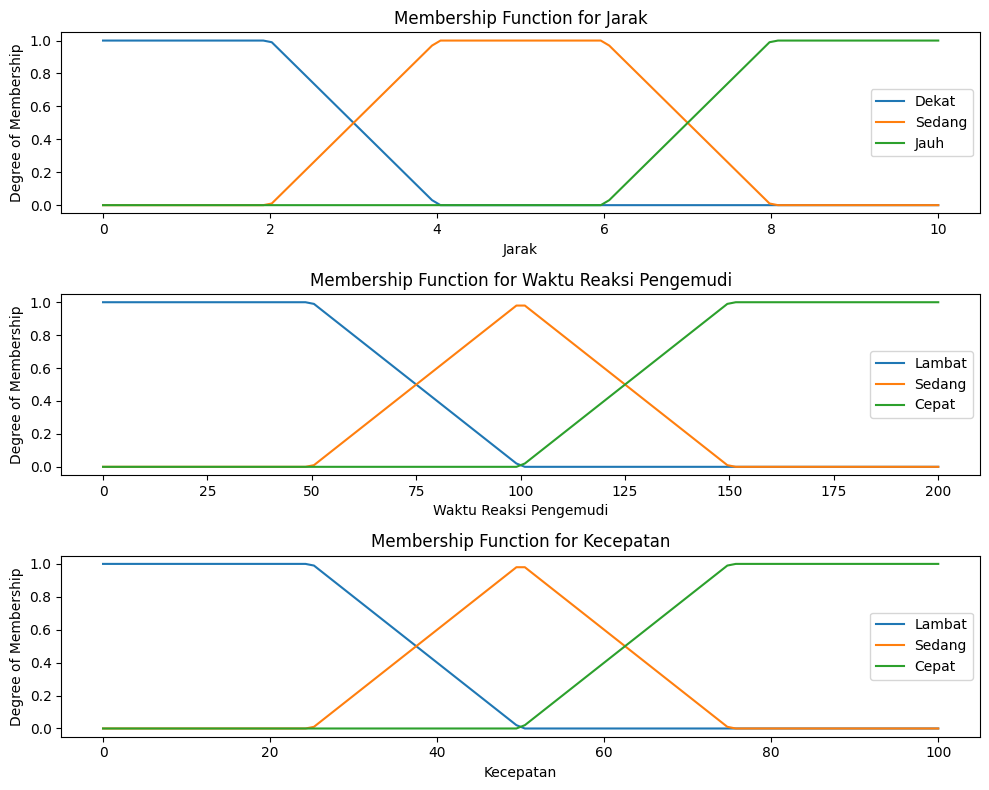

In [21]:
x = np.linspace(0, 10, 100)
w = np.linspace(0, 200, 100)
z = np.linspace(0, 100, 100)

plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(x, jarak_dekat(x), label='Dekat')
plt.plot(x, jarak_sedang(x), label='Sedang')
plt.plot(x, jarak_jauh(x), label='Jauh')
plt.title('Membership Function for Jarak')
plt.xlabel('Jarak')
plt.ylabel('Degree of Membership')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(w, waktu_lambat(w), label='Lambat')
plt.plot(w, waktu_sedang(w), label='Sedang')
plt.plot(w, waktu_cepat(w), label='Cepat')
plt.title('Membership Function for Waktu Reaksi Pengemudi')
plt.xlabel('Waktu Reaksi Pengemudi')
plt.ylabel('Degree of Membership')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(z, kecepatan_lambat(z), label='Lambat')
plt.plot(z, kecepatan_sedang(z), label='Sedang')
plt.plot(z, kecepatan_cepat(z), label='Cepat')
plt.title('Membership Function for Kecepatan')
plt.xlabel('Kecepatan')
plt.ylabel('Degree of Membership')
plt.legend()

plt.tight_layout()
plt.show()

# Visualisasi output kecepatan berdasarkan kombinasi jarak dan waktu reaksi pengemudi

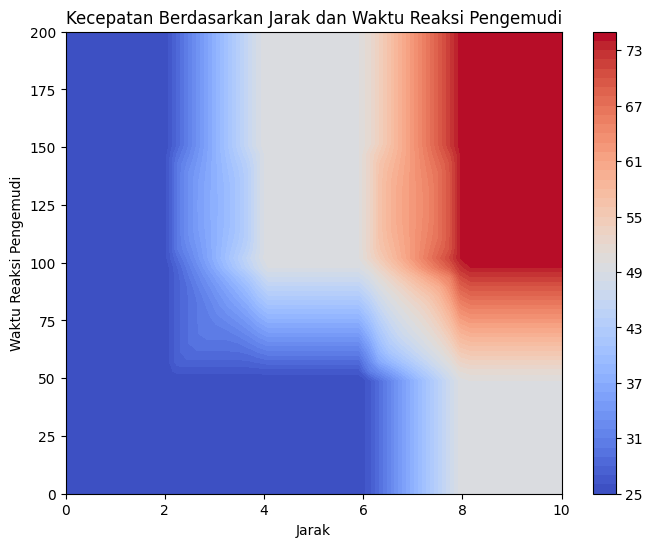

In [22]:
jarak_values = np.linspace(0, 10, 50)
waktu_values = np.linspace(0, 200, 50)
kecepatan_values = np.zeros((50, 50))

for i, j in np.ndindex(kecepatan_values.shape):
    kecepatan_values[i, j] = hitung_kecepatan(jarak_values[i], waktu_values[j])

X, Y = np.meshgrid(jarak_values, waktu_values)

plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, kecepatan_values.T, cmap='coolwarm', levels=50)
plt.colorbar(contour)
plt.title('Kecepatan Berdasarkan Jarak dan Waktu Reaksi Pengemudi')
plt.xlabel('Jarak')
plt.ylabel('Waktu Reaksi Pengemudi')
plt.show()

# Kesimpulan
Sistem pengendalian kecepatan menggunakan metode Fuzzy Tsukamoto efektif dalam menentukan kecepatan kendaraan berdasarkan input jarak dan waktu reaksi pengemudi. Visualisasi fungsi keanggotaan dan output kecepatan memberikan pemahaman yang jelas tentang bagaimana sistem bekerja dan bagaimana kecepatan yang dihasilkan dipengaruhi oleh perubahan input. Sistem ini dapat diimplementasikan dalam aplikasi nyata untuk meningkatkan keselamatan dan efisiensi dalam mengendalikan kecepatan kendaraan.





